In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("./final.csv")
data.head()

,#,case,time/us,best_time/us
0,1,2024-0ZE-13,12906905,9908417
1,2,2024-1RK-26,19158879,622019
2,3,2024-1WO-11,1764,1764
3,4,2024-2D0-22,4494943,1490165
4,5,2024-2KM-21,10962215,1391573


In [3]:
time = data["time/us"].sum() * 1e-6  # in seconds
time_h = time / 3600  # in hours

best_time = data["best_time/us"].sum() * 1e-6 
best_time_h = best_time / 3600
print(f"our time: {time_h:.2f} hours, best time: {best_time_h:.2f} hours")
print(f"our time: {time / 60: 2f} minutes, best time: {best_time / 60:.2f} minutes")

our time: 0.34 hours, best time: 0.13 hours
our time:  20.361939 minutes, best time: 7.60 minutes


/tmp/ipykernel_5178/2759962640.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="score", y="case", data=data, palette="coolwarm")


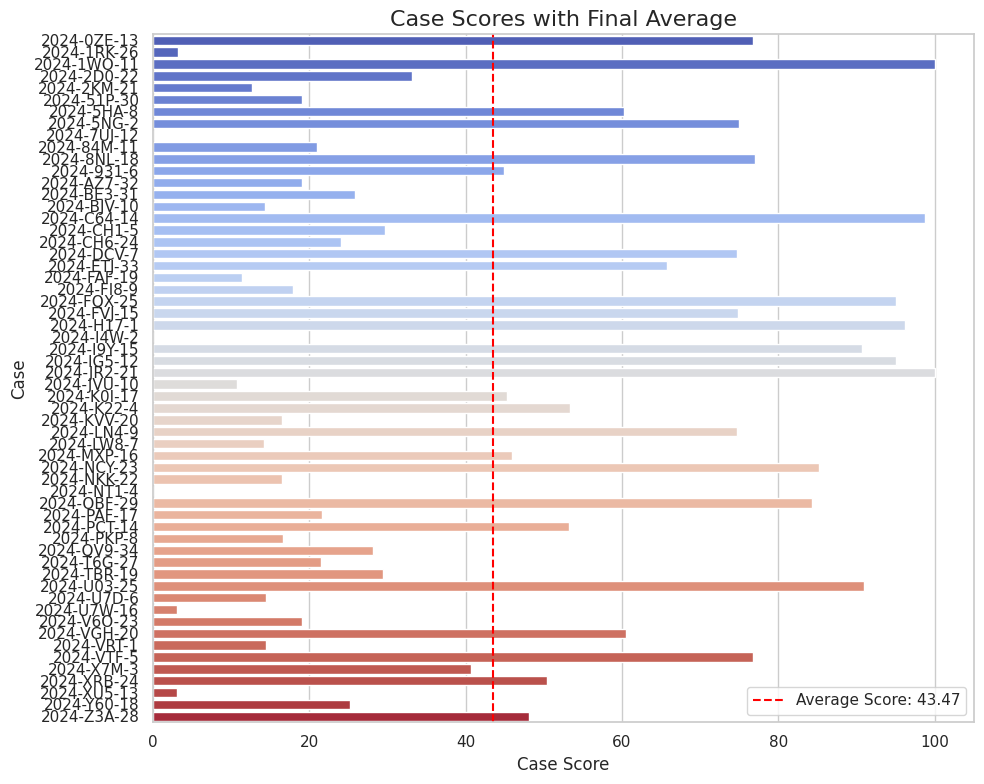

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate score
data["score"] = data.apply(
    lambda row: (
        0 if row["time/us"] == -1 else 100 * row["best_time/us"] / row["time/us"]
    ),
    axis=1,
)

# Calculate the final average score
average_score = data["score"].mean()

# Set up a Seaborn plot with a beautiful style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8))

# Plot the case scores
sns.barplot(x="score", y="case", data=data, palette="coolwarm")

# Add a title and labels
plt.title("Case Scores with Final Average", fontsize=16)
plt.axvline(
    average_score,
    color="red",
    linestyle="--",
    label=f"Average Score: {average_score:.2f}",
)
plt.legend()
plt.xlabel("Case Score")
plt.ylabel("Case")

# Show the plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_5178/932468932.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="case", y="score", data=data, palette="coolwarm")


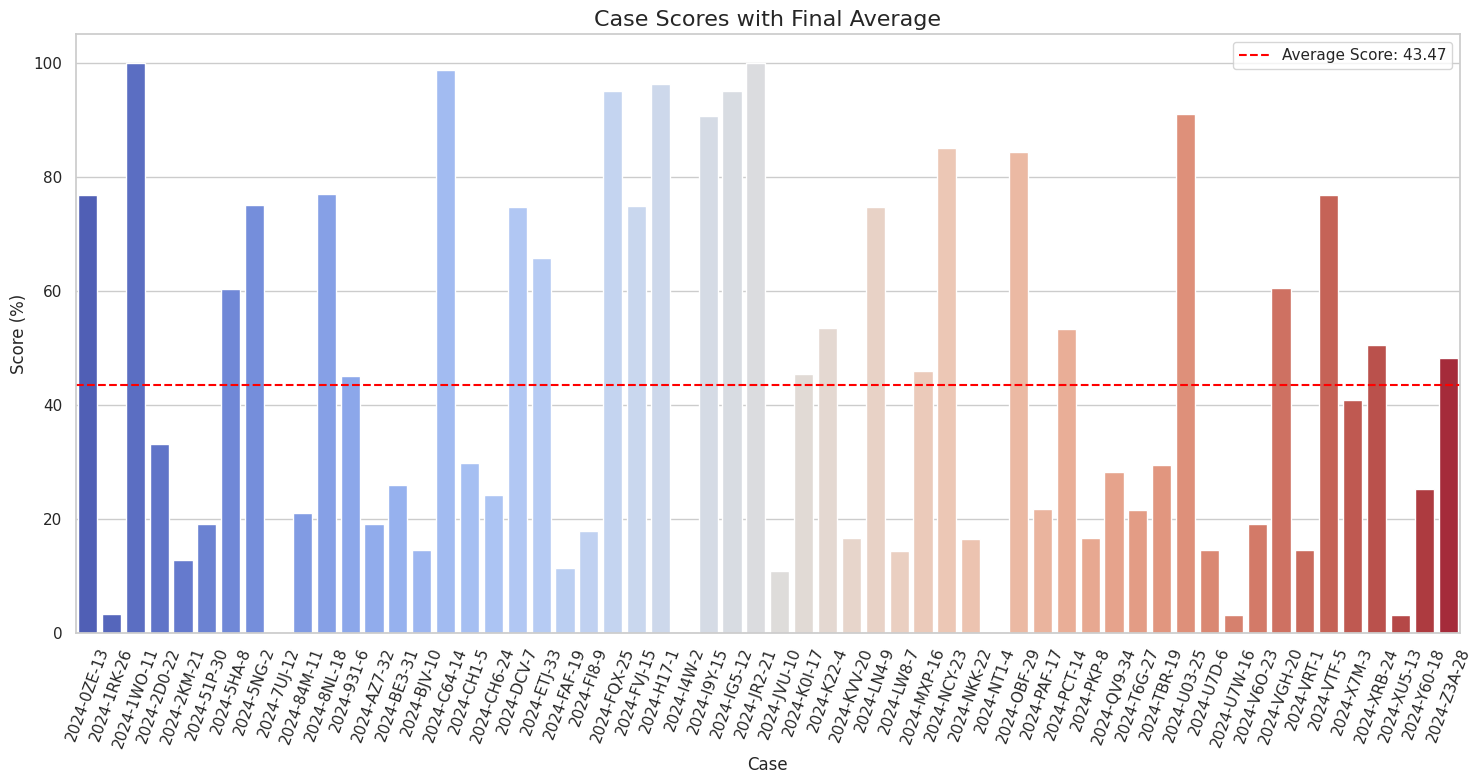

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate score
data["score"] = data.apply(
    lambda row: (
        0 if row["time/us"] == -1 else 100 * row["best_time/us"] / row["time/us"]
    ),
    axis=1,
)

# Calculate the final average score
average_score = data["score"].mean()

# Set up a Seaborn plot with a beautiful style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 8))

# Plot the case scores
sns.barplot(x="case", y="score", data=data, palette="coolwarm")


index = range(len(data["case"]))

plt.xticks(index, data["case"], rotation=70)
# Add a title and labels
plt.title("Case Scores with Final Average", fontsize=16)
plt.axhline(
    average_score,
    color="red",
    linestyle="--",
    label=f"Average Score: {average_score:.2f}",
)
plt.legend()
plt.xlabel("Case")
plt.ylabel("Score (%)")

# # Show the plot
plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate score
data["score"] = data.apply(
    lambda row: (
        0 if row["time/us"] == -1 else 100 * row["best_time/us"] / row["time/us"]
    ),
    axis=1,
)

In [34]:
data.head()

,#,case,time/us,best_time/us,score
2,3,2024-1WO-11,1764,1764,100.000000
28,29,2024-JR2-21,1713,1713,100.000000
15,16,2024-C64-14,1827,1803,98.686371
24,25,2024-H17-1,1833,1764,96.235679
27,28,2024-IG5-12,16048457,15259144,95.081689


/tmp/ipykernel_22552/2429668381.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x="case", y="score", data=data, palette=colors, dodge=False)
/tmp/ipykernel_22552/2429668381.py:16: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  bar_plot = sns.barplot(x="case", y="score", data=data, palette=colors, dodge=False)


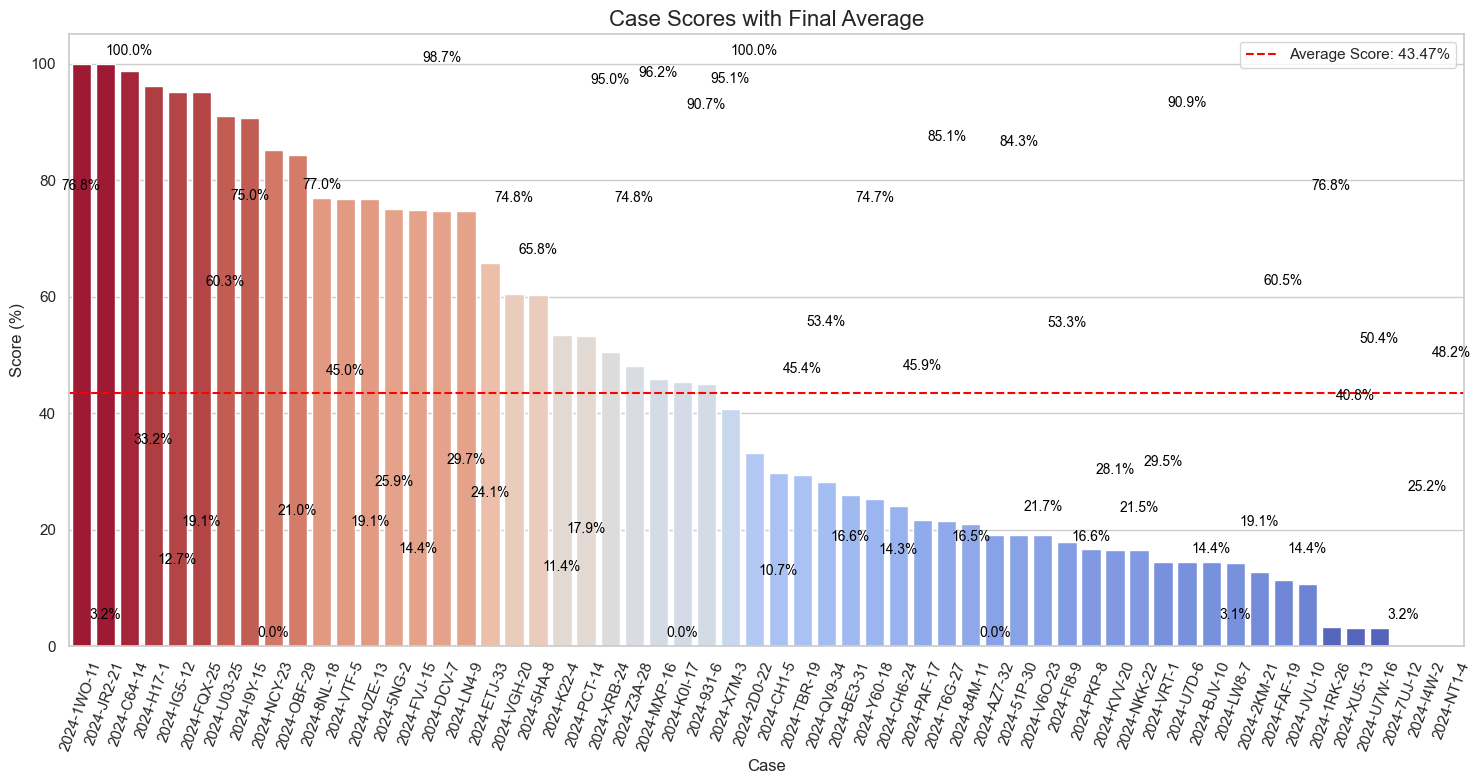

In [6]:
# Sort the data by score in descending order
data = data.sort_values(by="score", ascending=False)

# Calculate the final average score
average_score = data["score"].mean()

# Set up Seaborn plot with a beautiful style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 8))

# Define a color palette that shifts from blue (low scores) to red (high scores)
norm = plt.Normalize(data["score"].min(), data["score"].max())
colors = plt.cm.coolwarm(norm(data["score"]))

# Plot the case scores with color based on score value
bar_plot = sns.barplot(x="case", y="score", data=data, palette=colors, dodge=False)

# Add score percentage text at the top of each bar
for index, row in data.iterrows():
    bar_plot.text(
        index,
        row["score"] + 1,
        f"{row['score']:.1f}%",
        color="black",
        ha="center",
        va="bottom",
        fontsize=10,
    )

# Set x-axis labels to rotate for better readability
plt.xticks(rotation=70)

# Add a title and labels
plt.title("Case Scores with Final Average", fontsize=16)
plt.axhline(
    average_score,
    color="red",
    linestyle="--",
    label=f"Average Score: {average_score:.2f}%",
)
plt.legend()
plt.xlabel("Case")
plt.ylabel("Score (%)")


# Show the plot
plt.tight_layout()
plt.show()

In [39]:
data_sorted.head()

,#,case,time/us,best_time/us,score
2,3,2024-1WO-11,1764,1764,100.000000
28,29,2024-JR2-21,1713,1713,100.000000
15,16,2024-C64-14,1827,1803,98.686371
24,25,2024-H17-1,1833,1764,96.235679
27,28,2024-IG5-12,16048457,15259144,95.081689


/tmp/ipykernel_22552/2863548838.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_22552/2863548838.py:28: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  bar_plot = sns.barplot(


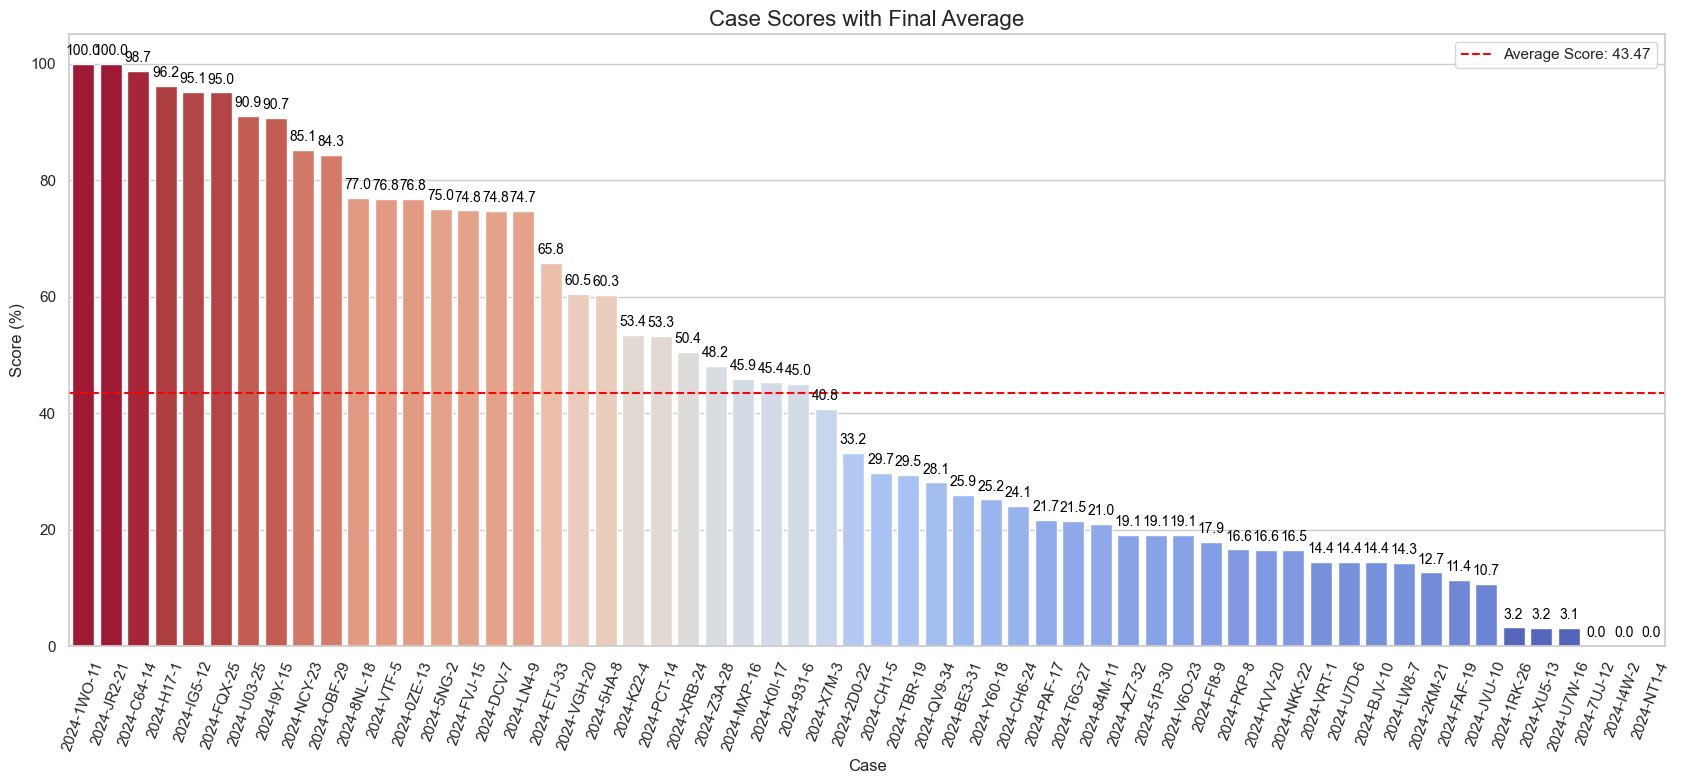

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate score
data["score"] = data.apply(
    lambda row: (
        0 if row["time/us"] == -1 else 100 * row["best_time/us"] / row["time/us"]
    ),
    axis=1,
)

# Sort data by score in descending order (highest scores first)
data_sorted = data.sort_values(by="score", ascending=False, ignore_index=True)

# Calculate the final average score
average_score = data_sorted["score"].mean()

# Set up Seaborn plot with a beautiful style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(17, 8))

# Define a color palette that shifts from blue (low scores) to red (high scores)
norm = plt.Normalize(data_sorted["score"].min(), data_sorted["score"].max())
colors = plt.cm.coolwarm(norm(data_sorted["score"]))

# Plot the case scores with color based on score value
bar_plot = sns.barplot(
    x="case", y="score", data=data_sorted, palette=colors, dodge=False
)

# add random delta y
delta_y = np.random.uniform(low=-0.5, high=0.5, size=len(data_sorted))
# Add score percentage text at the top of each bar
for index, row in data_sorted.iterrows():
    bar_plot.text(
        index, row["score"] + 1, f"{row['score']:.1f}",
        color="black", ha="center", va="bottom", fontsize=10
    )

# Set x-axis labels to rotate for better readability
plt.xticks(rotation=70)

# Add a title and labels
plt.title("Case Scores with Final Average", fontsize=16)
plt.axhline(
    average_score,
    color="red",
    linestyle="--",
    label=f"Average Score: {average_score:.2f}",
)
plt.legend()
plt.xlabel("Case")
plt.ylabel("Score (%)")

# Show the plot
plt.tight_layout()
plt.show()

In [9]:
data_sorted

,#,case,time/us,best_time/us,score
0,3,2024-1WO-11,1764,1764,100.000000
1,29,2024-JR2-21,1713,1713,100.000000
2,16,2024-C64-14,1827,1803,98.686371
3,25,2024-H17-1,1833,1764,96.235679
4,28,2024-IG5-12,16048457,15259144,95.081689
5,23,2024-FQX-25,1855,1763,95.040431
6,47,2024-U03-25,129124842,117439031,90.949990
7,27,2024-I9Y-15,547,496,90.676417
8,37,2024-NCY-23,22591161,19232414,85.132473
9,40,2024-OBF-29,7192725,6066274,84.339023


In [10]:
data_sorted.to_csv("case_score.csv", index=False)